In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

In [178]:
set_matplotlib_formats('retina')

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

pd.options.display.float_format = '{:.2f}'.format

In [179]:
df_xom = pd.read_csv(r'C:\python_workspace\Study\7_inf_sql\XOM 역사적 데이터 (1).csv', encoding = 'utf-8-sig')
df_oil = pd.read_csv(r'C:\python_workspace\Study\7_inf_sql\WTI유 선물 내역.csv', encoding = 'utf-8-sig')
df_boil = pd.read_csv(r'C:\python_workspace\Study\7_inf_sql\브렌트유 선물 내역.csv', encoding = 'utf-8-sig')

In [180]:
df_xom.head(1)

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 02월 08일,52.10,50.92,52.36,50.71,36.63M,4.30%


In [181]:
dfs = [df_xom, df_oil, df_boil]
dfs_list = list()

for i, df in enumerate(dfs):
    dates = df['날짜']
    dates = dates.str.replace('년','-').str.replace('월','-').str.replace('일','')
    df['날짜'] = pd.to_datetime(dates)
    df = df[['날짜', '종가']]
    dfs_list.append(df)
    if i == 0:
        df_merge = df
    else:     
        df_merge = df.merge(df_merge, left_index = True, right_index=True)

In [182]:
df_xom = dfs_list[0]

In [183]:
df_merge

,날짜,종가,날짜_x,종가_x,날짜_y,종가_y
0,2021-02-09,60.50,2021-02-09,57.84,2021-02-08,52.10
1,2021-02-08,60.56,2021-02-08,57.97,2021-02-05,49.95
2,2021-02-05,59.34,2021-02-05,56.85,2021-02-04,48.33
3,2021-02-04,58.84,2021-02-04,56.23,2021-02-03,47.42
4,2021-02-03,58.46,2021-02-03,55.69,2021-02-02,45.63
...,...,...,...,...,...,...
3545,2007-05-17,70.27,2007-05-17,64.86,2007-01-09,72.09
3546,2007-05-16,68.01,2007-05-16,62.55,2007-01-08,72.65
3547,2007-05-15,68.11,2007-05-15,63.17,2007-01-05,73.24
3548,2007-05-14,66.83,2007-05-14,62.46,2007-01-04,72.72


In [184]:
df_merge = df_merge[['날짜', '종가', '종가_x', '종가_y']]

In [185]:
cols = ['날짜','브렌트유가격','WTI원유가격', '엑슨모빌주가']
df_merge.columns = cols

In [186]:
df_merge = df_merge.set_index('날짜')

In [187]:
df_merge.resample('M', kind = 'period').mean().sort_values(by = '날짜', ascending = False)

,브렌트유가격,WTI원유가격,엑슨모빌주가
날짜,,,
2021-02,58.79,56.13,47.60
2021-01,55.32,52.34,46.11
2020-12,50.22,47.21,41.69
2020-11,43.98,41.89,35.99
2020-10,41.52,39.47,33.99
...,...,...,...
2007-09,76.96,80.12,81.58
2007-08,71.24,72.25,77.85
2007-07,75.82,74.52,72.03


In [241]:
df_merge.std()

브렌트유가격    26.52
WTI원유가격   24.06
엑슨모빌주가    13.54
dtype: float64

In [225]:
year = pd.date_range('2007-05','2021-02',freq = 'Y')

In [229]:
year = pd.Series(year)

In [230]:
df_merge_m['연도'] = year

In [232]:
df_merge_m = df_merge_m.pivot_table()

In [217]:
df_merge_m = df_merge.resample('M', kind='period').mean()
df_merge_m = df_merge_m.reset_index()

Text(0.5, 1.0, '브렌트유, WTI원유, 엑슨모빌 상관관계 분석')

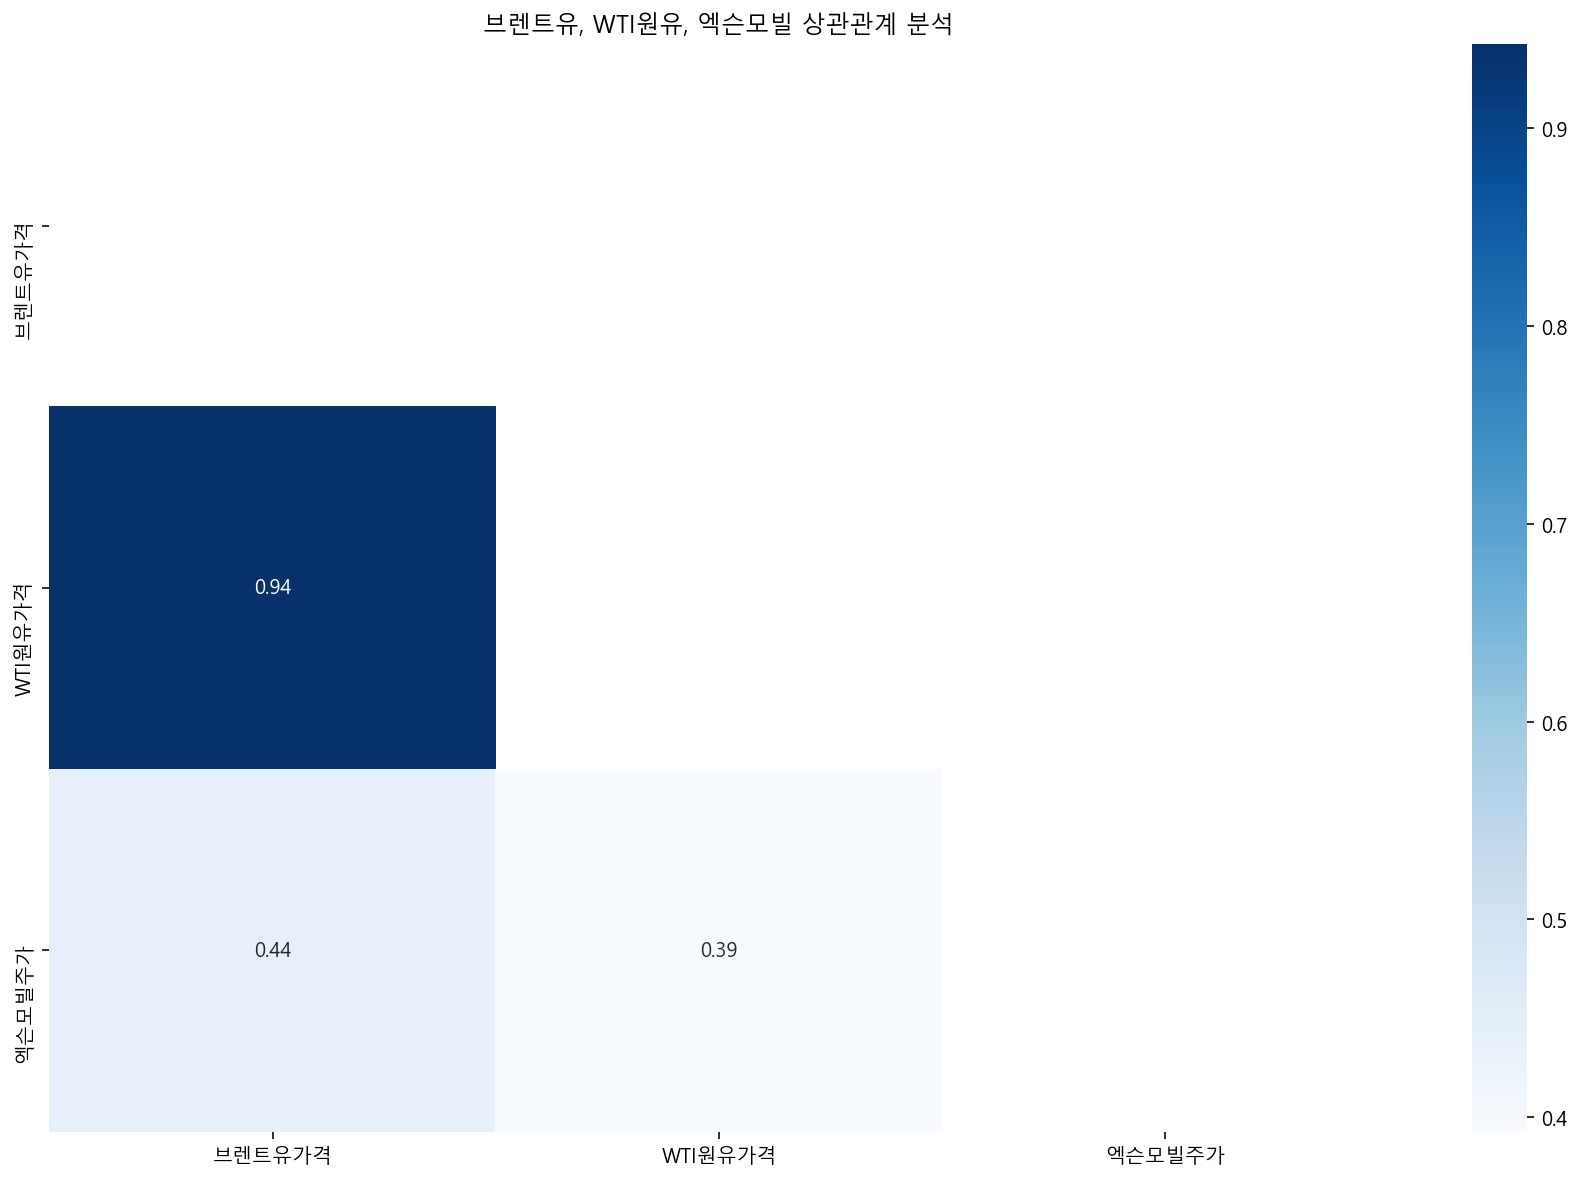

In [235]:
plt.figure(figsize=(15,10))
corr = df_merge.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask).set_title('브렌트유, WTI원유, 엑슨모빌 상관관계 분석')

In [189]:
df_merge_m = df_merge.resample('M', kind = 'period').mean()

In [236]:
df_merge_m.corr()

TypeError: corr() missing 1 required positional argument: 'other'

In [191]:
df_xom = df_xom.set_index('날짜')

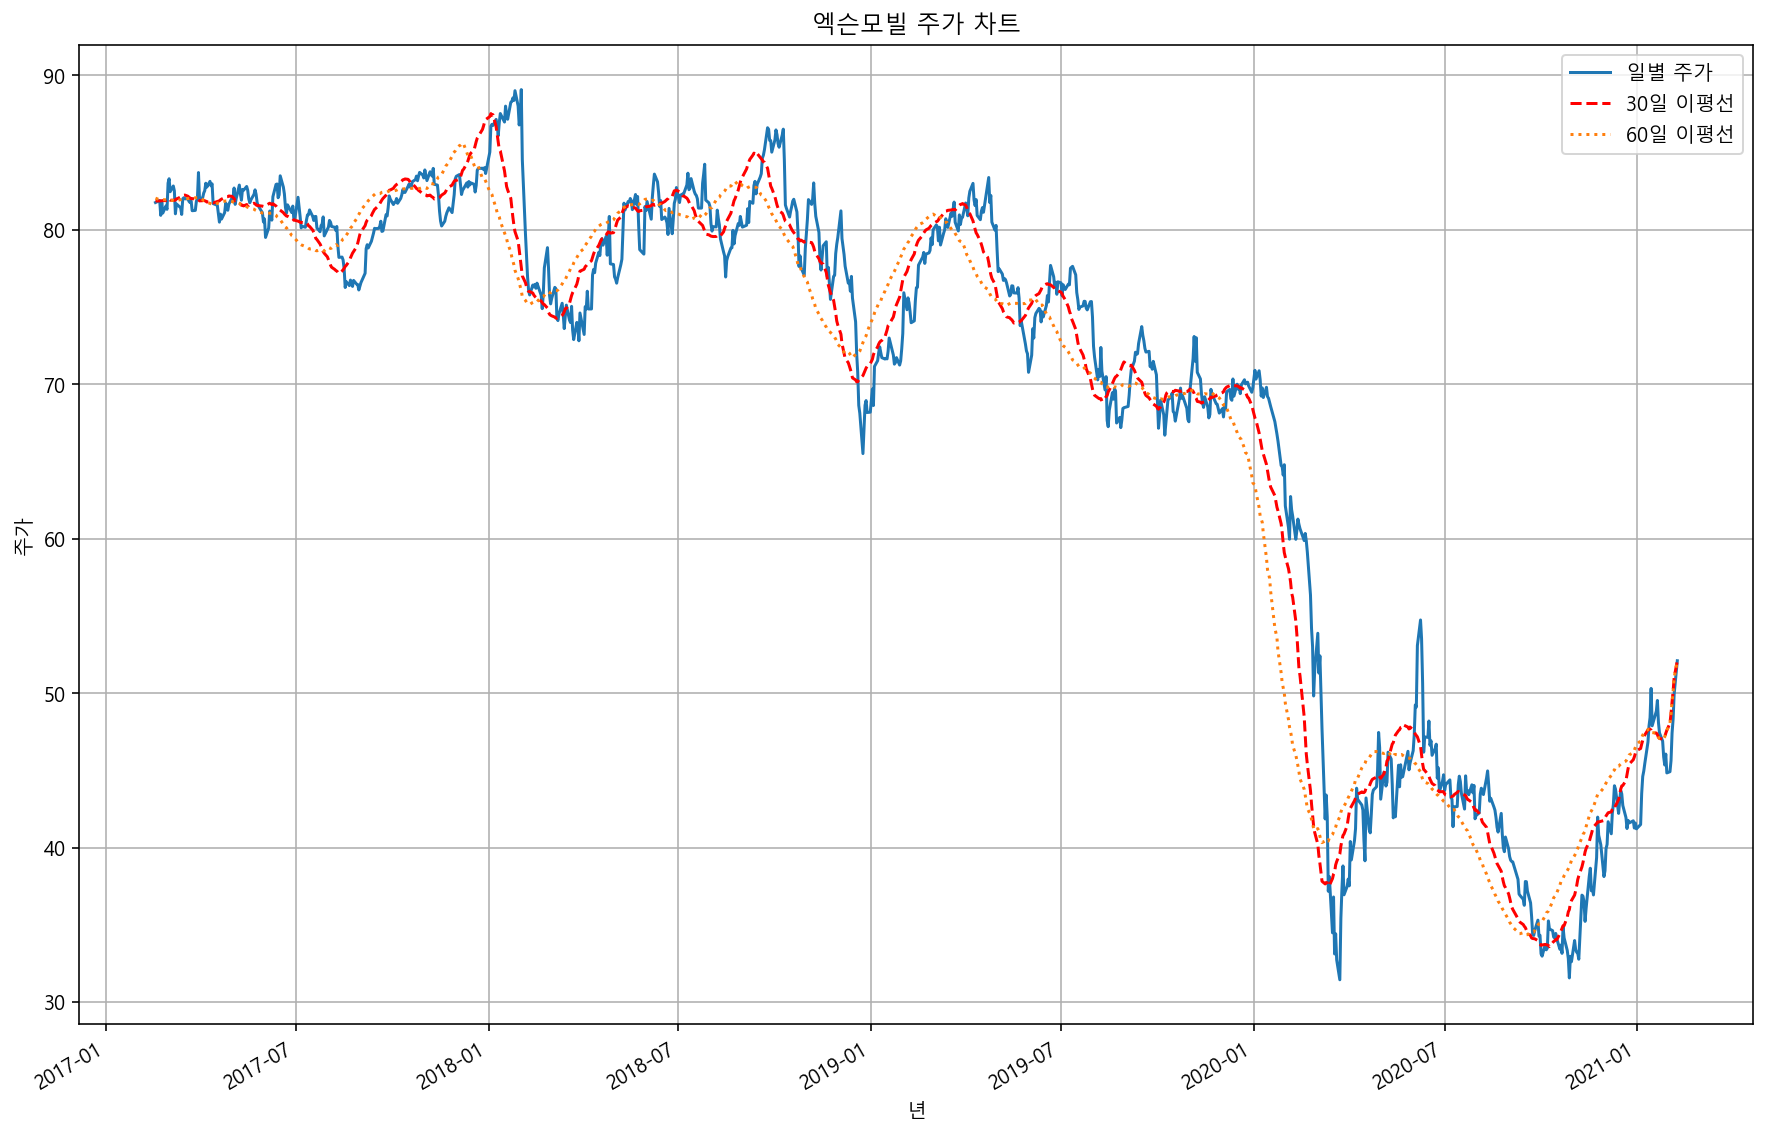

In [203]:
df_xom.종가[:1000].plot()
df_xom.종가.rolling('30D').mean()[:1000].plot(style='--', color = 'red')
df_xom.종가.rolling('60D').mean()[:1000].plot(figsize=(15,10), title = '엑슨모빌 주가 차트', ylabel ='주가', xlabel='년',style=':')
plt.legend(labels = ['일별 주가','30일 이평선','60일 이평선'])
plt.grid()
plt.savefig('엑슨모빌 주가 차트.png')

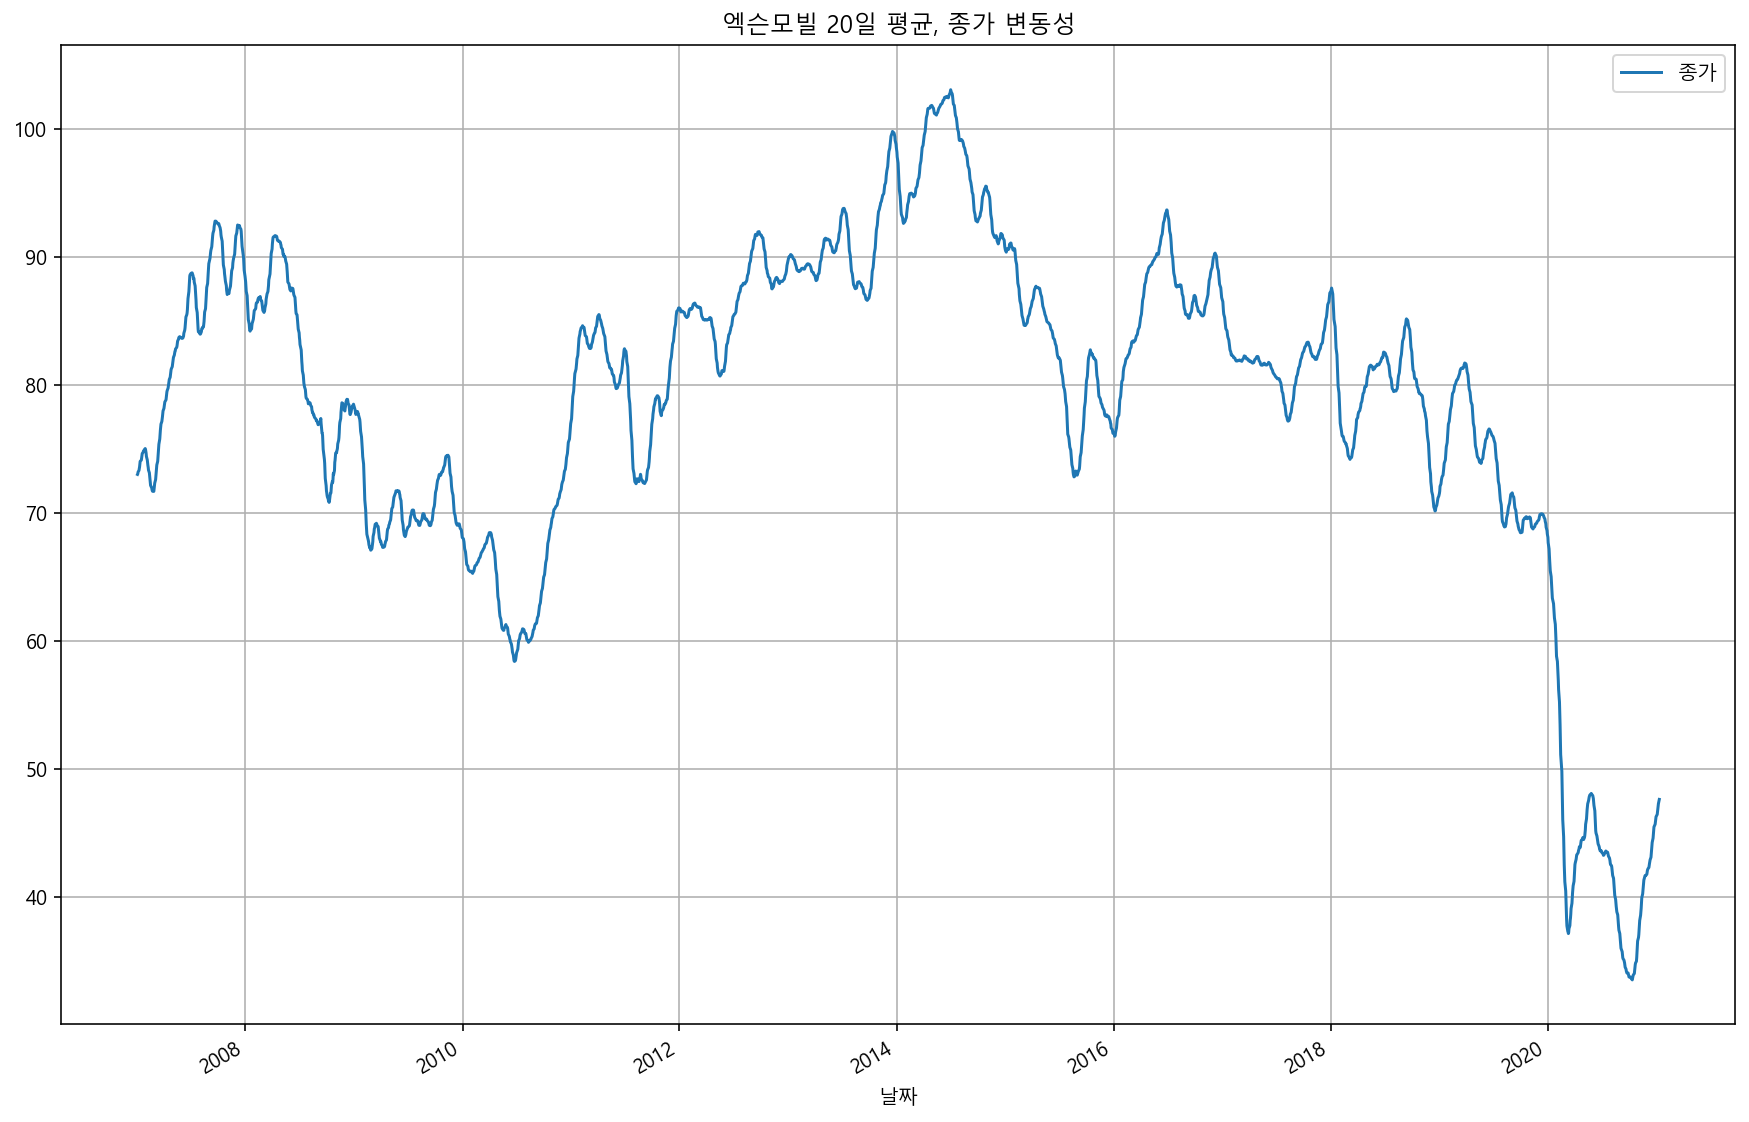

In [234]:
df_xom.rolling(20).mean().plot(title = '엑슨모빌 20일 평균, 종가 변동성', figsize=(15,10))
plt.grid()
plt.savefig('엑슨모빌 20일 평균, 종가 변동성.png')

In [243]:
df_merge

,브렌트유가격,WTI원유가격,엑슨모빌주가
날짜,,,
2021-02-09,60.50,57.84,52.10
2021-02-08,60.56,57.97,49.95
2021-02-05,59.34,56.85,48.33
2021-02-04,58.84,56.23,47.42
2021-02-03,58.46,55.69,45.63
...,...,...,...
2007-05-17,70.27,64.86,72.09
2007-05-16,68.01,62.55,72.65
2007-05-15,68.11,63.17,73.24


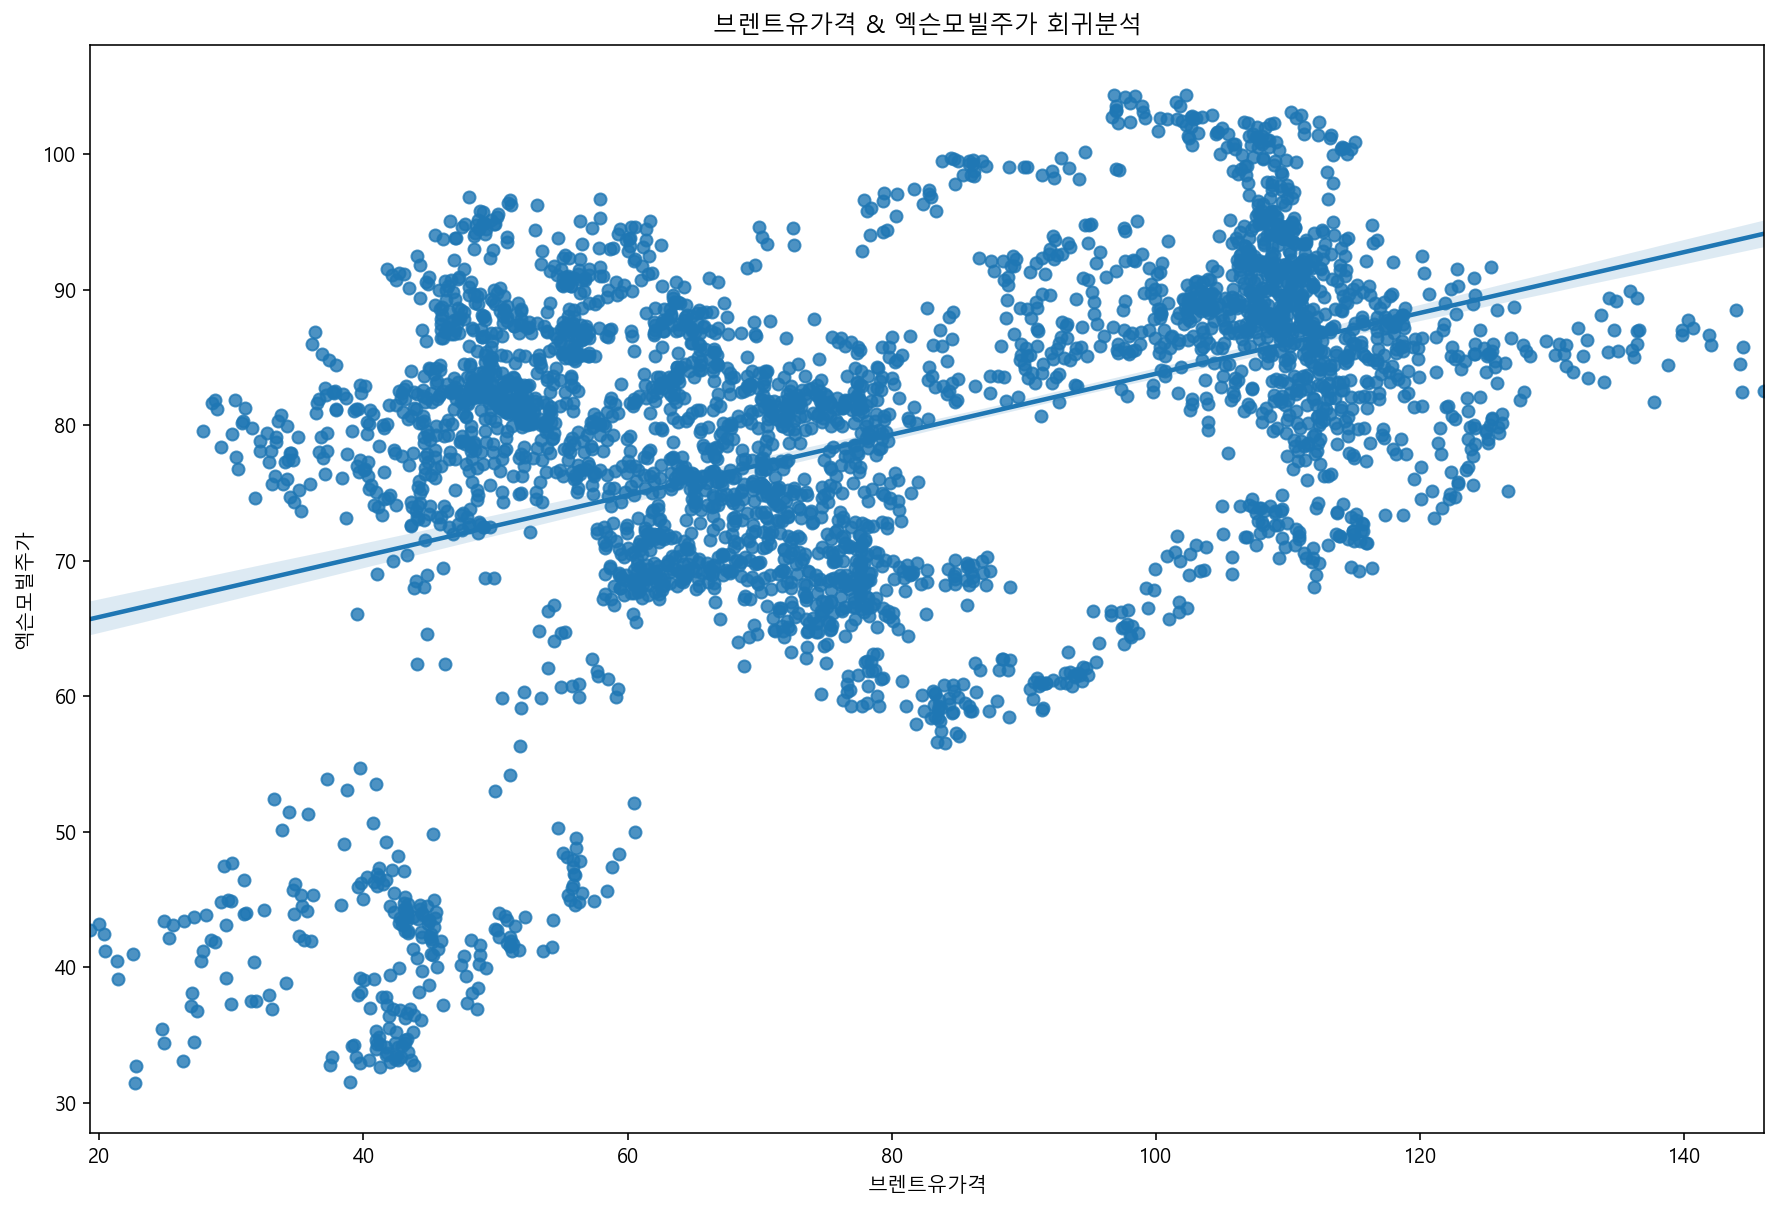

In [249]:
plt.figure(figsize=(15,10))
sns.regplot(data = df_merge, x = '브렌트유가격', y = '엑슨모빌주가').set_title('브렌트유가격 & 엑슨모빌주가 회귀분석')
plt.savefig('브렌트유가격 & 엑슨모빌주가 회귀분석.png')

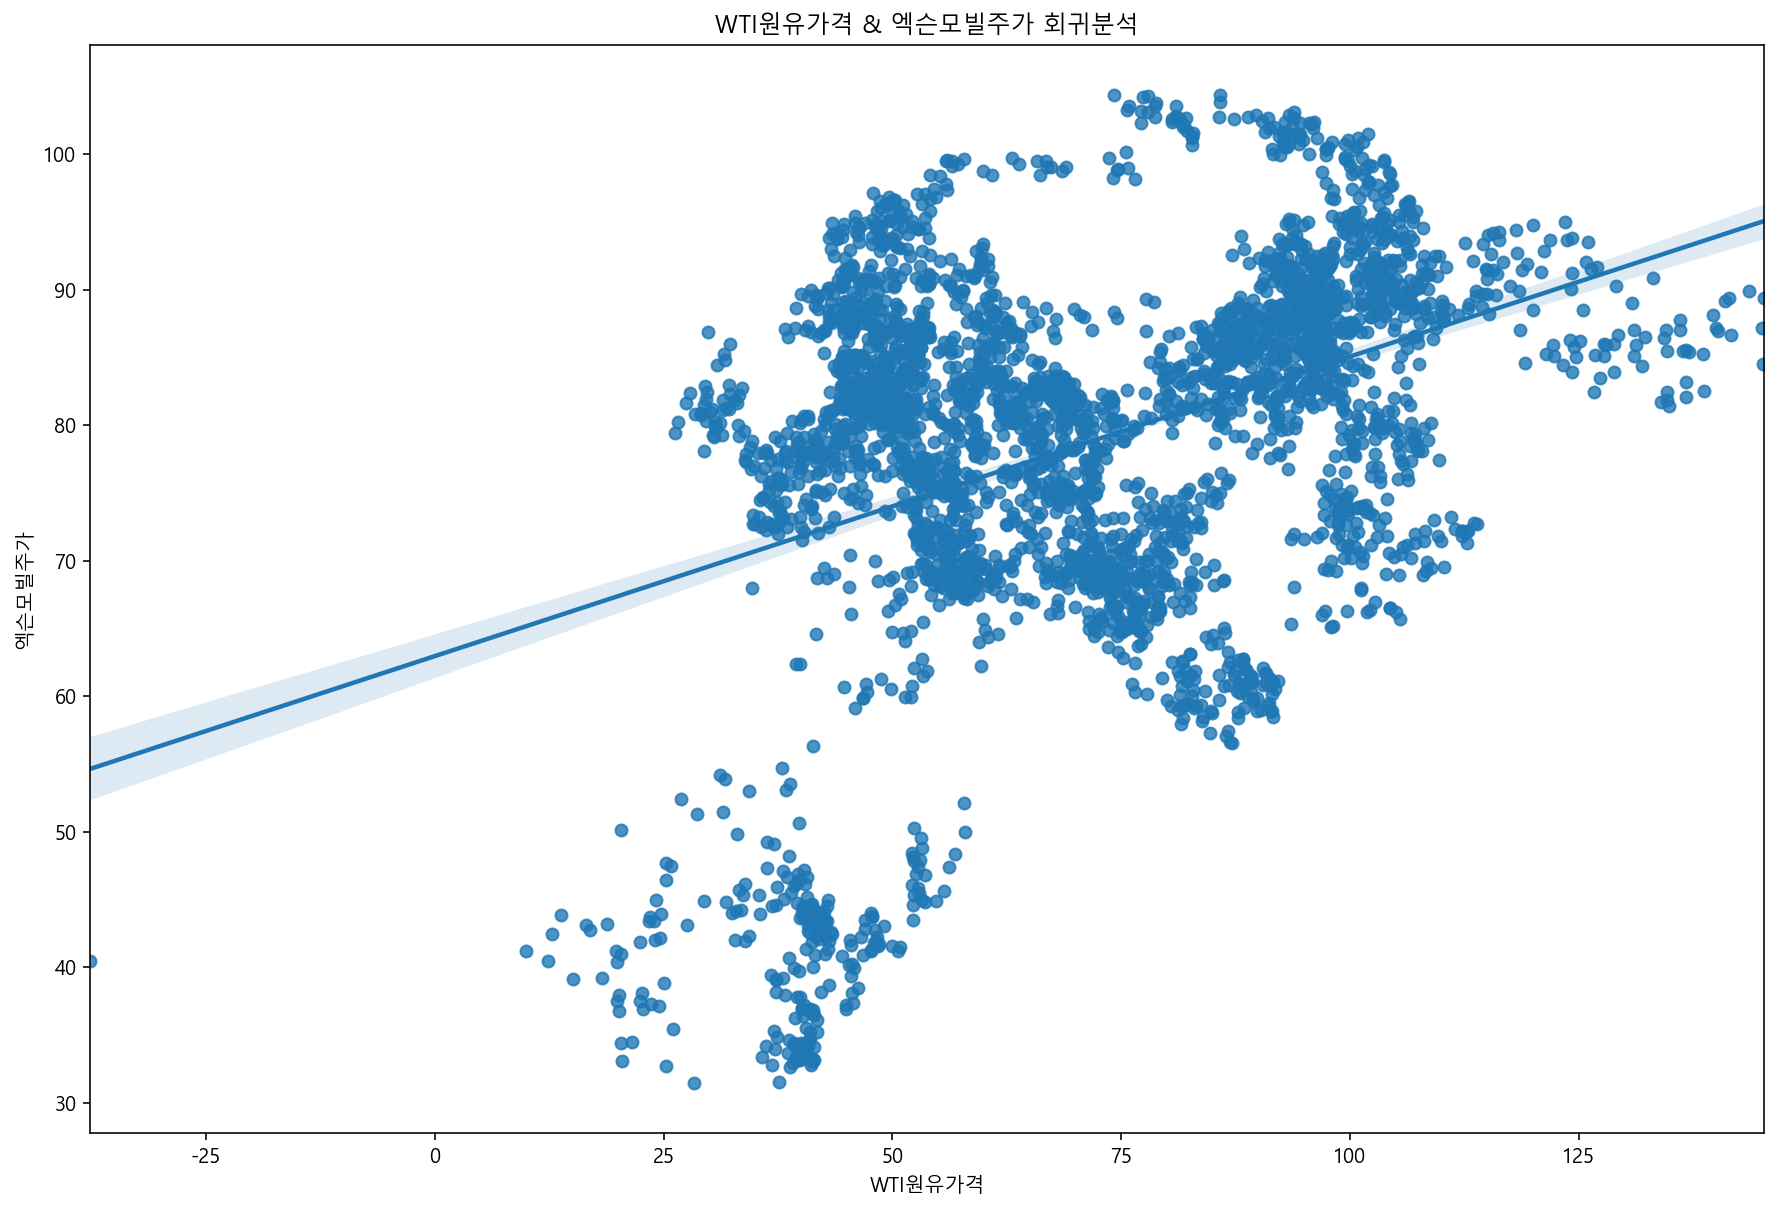

In [254]:
plt.figure(figsize=(15,10))
sns.regplot(data = df_merge, x = 'WTI원유가격', y = '엑슨모빌주가').set_title('WTI원유가격 & 엑슨모빌주가 회귀분석')
plt.savefig('WTI원유가격 & 엑슨모빌주가 회귀분석.png')